In [1]:
# Packages for EDA 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import TargetEncoder
from category_encoders import CatBoostEncoder
import joblib 

# Modeling
from sklearn.ensemble._forest import RandomForestRegressor
from sklearn.ensemble._forest import ExtraTreesRegressor
from sklearn.ensemble._bagging import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor


np.seterr(divide='ignore', invalid='ignore', over='ignore')
df1 = pd.read_csv('final-step1.csv')
df1.head()

,Make,Model,Year,Km,Transmission,Fuel,Price
0,Chery,Arrizo 5,2020.0,77000.0,automatic,gas,355000.0
1,Hyundai,Accent RB,2017.0,95000.0,automatic,gas,400000.0
2,Kia,Cerato,2016.0,106000.0,automatic,gas,415000.0
3,Jeep,Grand Cherokee,2019.0,60000.0,automatic,gas,2100000.0
4,Nissan,Sunny,2023.0,1800.0,automatic,gas,448000.0


In [2]:
df = df1.copy()

In [3]:
#Number of rows and columns
df.shape

(17911, 7)

In [4]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,37
1,Model,283
2,Year,52
3,Km,940
4,Transmission,2
5,Fuel,3
6,Price,694


In [5]:
df.head()

,Make,Model,Year,Km,Transmission,Fuel,Price
0,Chery,Arrizo 5,2020.0,77000.0,automatic,gas,355000.0
1,Hyundai,Accent RB,2017.0,95000.0,automatic,gas,400000.0
2,Kia,Cerato,2016.0,106000.0,automatic,gas,415000.0
3,Jeep,Grand Cherokee,2019.0,60000.0,automatic,gas,2100000.0
4,Nissan,Sunny,2023.0,1800.0,automatic,gas,448000.0


In [6]:
x, y = df.drop("Price",axis=1) , df["Price"] 

In [7]:
# set up the encoder
encoder = CatBoostEncoder(cols=['Make', 'Model', 'Fuel', 'Transmission'])

# fit the encoder - finds the mean target value per category
encoder.fit(x, y)

# transform data
x = encoder.transform(x)

In [8]:
encoder.mapping

{'Make':                     sum  count
 Audi         68860333.0     60
 BMW         392491500.0    479
 Brilliance   21453000.0     92
 Byd          89165000.0    392
 Changan      16314000.0     62
 Chery       212834300.0    539
 Chevrolet   357075990.0   1321
 CitroÃ«n     73940000.0    132
 DFSK         16775000.0     51
 Daewoo       61877007.0    509
 Daihatsu     18494000.0     83
 Fiat        203598233.0   1178
 Ford         82153611.0    185
 Geely        48870999.0    260
 Honda        26792000.0     95
 Hyundai     808053550.0   2079
 Isuzu        21885000.0     50
 Jac          27695000.0     67
 Jeep        181434030.0    257
 Kia         655477557.0   1376
 Lada         32383500.0    305
 MG          299313100.0    563
 Mazda        24277500.0    109
 Mercedes    676278000.0    571
 Mitsubishi  249264000.0    684
 Nissan      461946088.0   1334
 Opel        284713555.0    673
 Peugeot     233901508.0    578
 Proton       12733500.0     65
 Renault     307501000.0    963


In [9]:
x

,Make,Model,Year,Km,Transmission,Fuel
0,394869.120485,3.336572e+05,2020.0,77000.0,512309.856856,399147.828124
1,388677.199549,3.549645e+05,2017.0,95000.0,512309.856856,399147.828124
2,476305.433596,3.908124e+05,2016.0,106000.0,512309.856856,399147.828124
3,704763.779309,1.270081e+06,2019.0,60000.0,512309.856856,399147.828124
4,346322.931132,3.010784e+05,2023.0,1800.0,512309.856856,399147.828124
...,...,...,...,...,...,...
17906,388677.199549,3.693296e+05,2016.0,166000.0,512309.856856,399147.828124
17907,346322.931132,2.388008e+05,2008.0,122500.0,512309.856856,399147.828124
17908,476305.433596,7.950060e+04,2004.0,1300.0,141122.129693,399147.828124
17909,394869.120485,7.444240e+05,2022.0,31500.0,512309.856856,399147.828124


In [10]:
#Save
joblib.dump(encoder, 'encoder1.joblib')

['encoder1.joblib']

In [11]:
#Applying a Scale to the data
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x) , columns=x.columns)
x

,Make,Model,Year,Km,Transmission,Fuel
0,-0.000687,-0.201925,0.796027,-0.581738,0.67962,0.148202
1,-0.030639,-0.130691,0.498325,-0.354087,0.67962,0.148202
2,0.393233,-0.010845,0.399091,-0.214967,0.67962,0.148202
3,1.498321,2.928706,0.696793,-0.796743,0.67962,0.148202
4,-0.235513,-0.310841,1.093729,-1.532815,0.67962,0.148202
...,...,...,...,...,...,...
17906,-0.030639,-0.082666,0.399091,0.543871,0.67962,0.148202
17907,-0.235513,-0.519046,-0.394781,-0.006286,0.67962,0.148202
17908,0.393233,-1.051615,-0.791716,-1.539139,-1.47141,0.148202
17909,-0.000687,1.171342,0.994495,-1.157191,0.67962,0.148202


In [12]:
#Save
joblib.dump(std, 'std_scaler1.joblib', compress=True)

['std_scaler1.joblib']

In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [14]:
models = {
"LinearRegression":LinearRegression(),
"PoissonRegressor":PoissonRegressor(),
"BaggingRegressor": BaggingRegressor(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"ExtraTreeRegressor":ExtraTreeRegressor(),
"ExtraTreesRegressor":ExtraTreesRegressor(),
"HistGradientBoostingRegressor":HistGradientBoostingRegressor(),
"KNeighborsRegressor":KNeighborsRegressor(),
"RandomForestRegressor":RandomForestRegressor(),
"XGB_Regressor":XGBRegressor()    
       
}

In [15]:
#Training and Checking R2 Score & RMSE for different Models

for name, model in models.items():
    print(f'Model: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')  
    print('RMSE:')
    print(sqrt(mean_squared_error(y_test, y_pred)))
    print('_'*30)

Model: LinearRegression
R2 Score: 77.8 %
RMSE:
170066.51676183034
______________________________
Model: PoissonRegressor
R2 Score: 79.8 %
RMSE:
162019.72219337267
______________________________
Model: BaggingRegressor
R2 Score: 95.5 %
RMSE:
76446.13075025866
______________________________
Model: DecisionTreeRegressor
R2 Score: 93.5 %
RMSE:
92014.13192021733
______________________________
Model: ExtraTreeRegressor
R2 Score: 92.5 %
RMSE:
98674.7837960599
______________________________
Model: ExtraTreesRegressor
R2 Score: 95.9 %
RMSE:
73031.54053840713
______________________________
Model: HistGradientBoostingRegressor
R2 Score: 95.6 %
RMSE:
75769.03243651224
______________________________
Model: KNeighborsRegressor
R2 Score: 93.2 %
RMSE:
93926.00031185006
______________________________
Model: RandomForestRegressor
R2 Score: 96.2 %
RMSE:
69889.38038754015
______________________________
Model: XGB_Regressor
R2 Score: 96.5 %
RMSE:
67837.98217792409
______________________________


[0]	validation_0-logloss:-18832319.86477	validation_1-logloss:-18713172.71604
[1]	validation_0-logloss:-19088882.50997	validation_1-logloss:-18967131.37176
[2]	validation_0-logloss:-19231779.78988	validation_1-logloss:-19108979.01102
[3]	validation_0-logloss:-19328269.63560	validation_1-logloss:-19205003.58295
[4]	validation_0-logloss:-19399502.50241	validation_1-logloss:-19276183.40393
[5]	validation_0-logloss:-19454880.23786	validation_1-logloss:-19331038.92339
[6]	validation_0-logloss:-19499406.29696	validation_1-logloss:-19375373.91072
[7]	validation_0-logloss:-19536077.13021	validation_1-logloss:-19412026.45290
[8]	validation_0-logloss:-19566710.62423	validation_1-logloss:-19442494.46365
[9]	validation_0-logloss:-19592709.04234	validation_1-logloss:-19468583.79937
[10]	validation_0-logloss:-19615028.58825	validation_1-logloss:-19490866.92213
[11]	validation_0-logloss:-19634351.46290	validation_1-logloss:-19510119.69613
[12]	validation_0-logloss:-19651131.05091	validation_1-logloss

C:\Users\ahmed\miniconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-logloss:-19769588.48137	validation_1-logloss:-19644671.62142
[31]	validation_0-logloss:-19771710.67252	validation_1-logloss:-19646747.69968
[32]	validation_0-logloss:-19773624.98532	validation_1-logloss:-19648679.17468
[33]	validation_0-logloss:-19775371.35725	validation_1-logloss:-19650411.31736
[34]	validation_0-logloss:-19776955.42700	validation_1-logloss:-19652030.09168
[35]	validation_0-logloss:-19778414.53390	validation_1-logloss:-19653506.96290
[36]	validation_0-logloss:-19779736.13905	validation_1-logloss:-19654827.00480
[37]	validation_0-logloss:-19780940.85572	validation_1-logloss:-19656066.09714
[38]	validation_0-logloss:-19782025.59715	validation_1-logloss:-19657115.25719
[39]	validation_0-logloss:-19783021.30332	validation_1-logloss:-19658052.65946
[40]	validation_0-logloss:-19783928.46528	validation_1-logloss:-19658967.49912
[41]	validation_0-logloss:-19784763.31737	validation_1-logloss:-19659810.90183
[42]	validation_0-logloss:-19785518.02970	validation

[134]	validation_0-logloss:-19794105.06300	validation_1-logloss:-19668373.44663
[135]	validation_0-logloss:-19794108.15758	validation_1-logloss:-19668377.90103
[136]	validation_0-logloss:-19794116.76483	validation_1-logloss:-19668379.54076
[137]	validation_0-logloss:-19794119.71477	validation_1-logloss:-19668384.10668
[138]	validation_0-logloss:-19794126.34731	validation_1-logloss:-19668392.01867
[139]	validation_0-logloss:-19794134.90320	validation_1-logloss:-19668389.93078
[140]	validation_0-logloss:-19794144.45591	validation_1-logloss:-19668394.48751
[141]	validation_0-logloss:-19794154.77377	validation_1-logloss:-19668394.19999
[142]	validation_0-logloss:-19794163.74334	validation_1-logloss:-19668395.65947
[143]	validation_0-logloss:-19794170.35273	validation_1-logloss:-19668397.10541
[144]	validation_0-logloss:-19794173.63602	validation_1-logloss:-19668397.58723
[145]	validation_0-logloss:-19794179.58352	validation_1-logloss:-19668387.40358
[146]	validation_0-logloss:-19794191.752

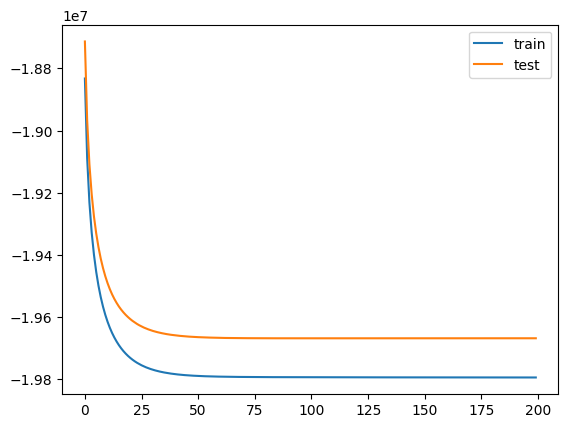

In [32]:
#Plot the Learning Curve of the Train set and Test set

# define the model
model = XGBRegressor(n_estimators=200, eta=0.05,max_depth=8)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
y_pred = model.predict(X_test) 
print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [18]:
#Searching for the best model hyper-parameters using GridSearch-CrossValidation

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[10,20,50,100,150,200],
 'max_depth':range(3,11),
 'eta':[0.05,0.07,0.09,0.1,0.2,0.3]}
xgr=xgb.XGBRegressor()
gs=GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END eta=0.05, max_depth=3, n_estimators=10;, score=-338586.467 total time=   0.0s
[CV 2/5] END eta=0.05, max_depth=3, n_estimators=10;, score=-360904.930 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=3, n_estimators=10;, score=-349129.562 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=3, n_estimators=10;, score=-352061.529 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=3, n_estimators=10;, score=-361434.382 total time=   0.0s
[CV 1/5] END eta=0.05, max_depth=3, n_estimators=20;, score=-236050.798 total time=   0.0s
[CV 2/5] END eta=0.05, max_depth=3, n_estimators=20;, score=-251234.833 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=3, n_estimators=20;, score=-236548.431 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=3, n_estimators=20;, score=-243157.701 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=3, n_estimators=20;, score=-250124.057 total time=   0.0s
[CV 1/5] END eta=0.05, max

[CV 1/5] END eta=0.05, max_depth=6, n_estimators=20;, score=-220338.283 total time=   0.0s
[CV 2/5] END eta=0.05, max_depth=6, n_estimators=20;, score=-227963.474 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=6, n_estimators=20;, score=-215806.166 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=6, n_estimators=20;, score=-224509.066 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=6, n_estimators=20;, score=-229250.493 total time=   0.0s
[CV 1/5] END eta=0.05, max_depth=6, n_estimators=50;, score=-113546.385 total time=   0.1s
[CV 2/5] END eta=0.05, max_depth=6, n_estimators=50;, score=-114224.086 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=6, n_estimators=50;, score=-98794.878 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=6, n_estimators=50;, score=-104778.754 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=6, n_estimators=50;, score=-113250.815 total time=   0.0s
[CV 1/5] END eta=0.05, max_depth=6, n_estimators=100;, score=-99615.870 total time=   0.2s


[CV 2/5] END eta=0.05, max_depth=9, n_estimators=20;, score=-225697.503 total time=   0.0s
[CV 3/5] END eta=0.05, max_depth=9, n_estimators=20;, score=-213640.534 total time=   0.0s
[CV 4/5] END eta=0.05, max_depth=9, n_estimators=20;, score=-220865.536 total time=   0.0s
[CV 5/5] END eta=0.05, max_depth=9, n_estimators=20;, score=-226361.887 total time=   0.0s
[CV 1/5] END eta=0.05, max_depth=9, n_estimators=50;, score=-107107.265 total time=   0.2s
[CV 2/5] END eta=0.05, max_depth=9, n_estimators=50;, score=-108952.731 total time=   0.2s
[CV 3/5] END eta=0.05, max_depth=9, n_estimators=50;, score=-91633.453 total time=   0.2s
[CV 4/5] END eta=0.05, max_depth=9, n_estimators=50;, score=-96357.734 total time=   0.2s
[CV 5/5] END eta=0.05, max_depth=9, n_estimators=50;, score=-109200.781 total time=   0.2s
[CV 1/5] END eta=0.05, max_depth=9, n_estimators=100;, score=-95020.089 total time=   0.4s
[CV 2/5] END eta=0.05, max_depth=9, n_estimators=100;, score=-91692.206 total time=   0.4s
[

[CV 2/5] END eta=0.07, max_depth=4, n_estimators=20;, score=-184729.067 total time=   0.0s
[CV 3/5] END eta=0.07, max_depth=4, n_estimators=20;, score=-169169.398 total time=   0.0s
[CV 4/5] END eta=0.07, max_depth=4, n_estimators=20;, score=-179548.594 total time=   0.0s
[CV 5/5] END eta=0.07, max_depth=4, n_estimators=20;, score=-182828.048 total time=   0.0s
[CV 1/5] END eta=0.07, max_depth=4, n_estimators=50;, score=-115162.087 total time=   0.0s
[CV 2/5] END eta=0.07, max_depth=4, n_estimators=50;, score=-114610.949 total time=   0.0s
[CV 3/5] END eta=0.07, max_depth=4, n_estimators=50;, score=-101544.650 total time=   0.0s
[CV 4/5] END eta=0.07, max_depth=4, n_estimators=50;, score=-105474.290 total time=   0.0s
[CV 5/5] END eta=0.07, max_depth=4, n_estimators=50;, score=-112068.157 total time=   0.0s
[CV 1/5] END eta=0.07, max_depth=4, n_estimators=100;, score=-108821.013 total time=   0.1s
[CV 2/5] END eta=0.07, max_depth=4, n_estimators=100;, score=-103371.455 total time=   0.

[CV 3/5] END eta=0.07, max_depth=7, n_estimators=20;, score=-157207.745 total time=   0.0s
[CV 4/5] END eta=0.07, max_depth=7, n_estimators=20;, score=-165148.345 total time=   0.0s
[CV 5/5] END eta=0.07, max_depth=7, n_estimators=20;, score=-170304.343 total time=   0.0s
[CV 1/5] END eta=0.07, max_depth=7, n_estimators=50;, score=-100250.765 total time=   0.1s
[CV 2/5] END eta=0.07, max_depth=7, n_estimators=50;, score=-95075.700 total time=   0.1s
[CV 3/5] END eta=0.07, max_depth=7, n_estimators=50;, score=-85121.957 total time=   0.2s
[CV 4/5] END eta=0.07, max_depth=7, n_estimators=50;, score=-87671.181 total time=   0.2s
[CV 5/5] END eta=0.07, max_depth=7, n_estimators=50;, score=-96774.899 total time=   0.1s
[CV 1/5] END eta=0.07, max_depth=7, n_estimators=100;, score=-95319.102 total time=   0.4s
[CV 2/5] END eta=0.07, max_depth=7, n_estimators=100;, score=-86100.244 total time=   0.3s
[CV 3/5] END eta=0.07, max_depth=7, n_estimators=100;, score=-79682.271 total time=   0.2s
[CV

[CV 5/5] END eta=0.07, max_depth=10, n_estimators=20;, score=-168155.185 total time=   0.0s
[CV 1/5] END eta=0.07, max_depth=10, n_estimators=50;, score=-97745.615 total time=   0.3s
[CV 2/5] END eta=0.07, max_depth=10, n_estimators=50;, score=-96836.177 total time=   0.3s
[CV 3/5] END eta=0.07, max_depth=10, n_estimators=50;, score=-83191.446 total time=   0.3s
[CV 4/5] END eta=0.07, max_depth=10, n_estimators=50;, score=-83229.897 total time=   0.3s
[CV 5/5] END eta=0.07, max_depth=10, n_estimators=50;, score=-95229.972 total time=   0.4s
[CV 1/5] END eta=0.07, max_depth=10, n_estimators=100;, score=-96167.297 total time=   0.8s
[CV 2/5] END eta=0.07, max_depth=10, n_estimators=100;, score=-93232.469 total time=   0.5s
[CV 3/5] END eta=0.07, max_depth=10, n_estimators=100;, score=-82920.697 total time=   0.5s
[CV 4/5] END eta=0.07, max_depth=10, n_estimators=100;, score=-80382.039 total time=   0.5s
[CV 5/5] END eta=0.07, max_depth=10, n_estimators=100;, score=-89704.512 total time= 

[CV 5/5] END eta=0.09, max_depth=5, n_estimators=20;, score=-143979.373 total time=   0.0s
[CV 1/5] END eta=0.09, max_depth=5, n_estimators=50;, score=-104139.010 total time=   0.0s
[CV 2/5] END eta=0.09, max_depth=5, n_estimators=50;, score=-100511.242 total time=   0.0s
[CV 3/5] END eta=0.09, max_depth=5, n_estimators=50;, score=-89641.301 total time=   0.0s
[CV 4/5] END eta=0.09, max_depth=5, n_estimators=50;, score=-92330.925 total time=   0.0s
[CV 5/5] END eta=0.09, max_depth=5, n_estimators=50;, score=-101553.861 total time=   0.0s
[CV 1/5] END eta=0.09, max_depth=5, n_estimators=100;, score=-97836.969 total time=   0.1s
[CV 2/5] END eta=0.09, max_depth=5, n_estimators=100;, score=-91462.195 total time=   0.1s
[CV 3/5] END eta=0.09, max_depth=5, n_estimators=100;, score=-84785.986 total time=   0.1s
[CV 4/5] END eta=0.09, max_depth=5, n_estimators=100;, score=-84493.225 total time=   0.1s
[CV 5/5] END eta=0.09, max_depth=5, n_estimators=100;, score=-94667.100 total time=   0.1s
[

[CV 1/5] END eta=0.09, max_depth=8, n_estimators=50;, score=-95704.965 total time=   0.1s
[CV 2/5] END eta=0.09, max_depth=8, n_estimators=50;, score=-92519.016 total time=   0.1s
[CV 3/5] END eta=0.09, max_depth=8, n_estimators=50;, score=-80286.021 total time=   0.1s
[CV 4/5] END eta=0.09, max_depth=8, n_estimators=50;, score=-81512.571 total time=   0.1s
[CV 5/5] END eta=0.09, max_depth=8, n_estimators=50;, score=-92322.079 total time=   0.1s
[CV 1/5] END eta=0.09, max_depth=8, n_estimators=100;, score=-92706.926 total time=   0.3s
[CV 2/5] END eta=0.09, max_depth=8, n_estimators=100;, score=-89067.497 total time=   0.3s
[CV 3/5] END eta=0.09, max_depth=8, n_estimators=100;, score=-79024.554 total time=   0.3s
[CV 4/5] END eta=0.09, max_depth=8, n_estimators=100;, score=-79241.286 total time=   0.3s
[CV 5/5] END eta=0.09, max_depth=8, n_estimators=100;, score=-89363.778 total time=   0.3s
[CV 1/5] END eta=0.09, max_depth=8, n_estimators=150;, score=-92445.870 total time=   0.4s
[CV 

[CV 2/5] END eta=0.1, max_depth=3, n_estimators=50;, score=-117131.803 total time=   0.0s
[CV 3/5] END eta=0.1, max_depth=3, n_estimators=50;, score=-104656.907 total time=   0.0s
[CV 4/5] END eta=0.1, max_depth=3, n_estimators=50;, score=-106086.180 total time=   0.0s
[CV 5/5] END eta=0.1, max_depth=3, n_estimators=50;, score=-112385.772 total time=   0.0s
[CV 1/5] END eta=0.1, max_depth=3, n_estimators=100;, score=-107776.010 total time=   0.0s
[CV 2/5] END eta=0.1, max_depth=3, n_estimators=100;, score=-109174.506 total time=   0.0s
[CV 3/5] END eta=0.1, max_depth=3, n_estimators=100;, score=-97587.127 total time=   0.0s
[CV 4/5] END eta=0.1, max_depth=3, n_estimators=100;, score=-96252.714 total time=   0.0s
[CV 5/5] END eta=0.1, max_depth=3, n_estimators=100;, score=-105674.689 total time=   0.0s
[CV 1/5] END eta=0.1, max_depth=3, n_estimators=150;, score=-103578.614 total time=   0.1s
[CV 2/5] END eta=0.1, max_depth=3, n_estimators=150;, score=-102351.298 total time=   0.1s
[CV 3

[CV 4/5] END eta=0.1, max_depth=6, n_estimators=50;, score=-85762.763 total time=   0.0s
[CV 5/5] END eta=0.1, max_depth=6, n_estimators=50;, score=-97196.782 total time=   0.1s
[CV 1/5] END eta=0.1, max_depth=6, n_estimators=100;, score=-92840.483 total time=   0.2s
[CV 2/5] END eta=0.1, max_depth=6, n_estimators=100;, score=-89057.857 total time=   0.2s
[CV 3/5] END eta=0.1, max_depth=6, n_estimators=100;, score=-80214.446 total time=   0.2s
[CV 4/5] END eta=0.1, max_depth=6, n_estimators=100;, score=-79720.458 total time=   0.2s
[CV 5/5] END eta=0.1, max_depth=6, n_estimators=100;, score=-92434.253 total time=   0.2s
[CV 1/5] END eta=0.1, max_depth=6, n_estimators=150;, score=-91354.331 total time=   0.3s
[CV 2/5] END eta=0.1, max_depth=6, n_estimators=150;, score=-86475.699 total time=   0.3s
[CV 3/5] END eta=0.1, max_depth=6, n_estimators=150;, score=-78030.812 total time=   0.3s
[CV 4/5] END eta=0.1, max_depth=6, n_estimators=150;, score=-78115.767 total time=   0.3s
[CV 5/5] END

[CV 1/5] END eta=0.1, max_depth=9, n_estimators=100;, score=-95152.912 total time=   0.4s
[CV 2/5] END eta=0.1, max_depth=9, n_estimators=100;, score=-91643.767 total time=   0.4s
[CV 3/5] END eta=0.1, max_depth=9, n_estimators=100;, score=-80537.287 total time=   0.4s
[CV 4/5] END eta=0.1, max_depth=9, n_estimators=100;, score=-78924.636 total time=   0.4s
[CV 5/5] END eta=0.1, max_depth=9, n_estimators=100;, score=-89250.056 total time=   0.3s
[CV 1/5] END eta=0.1, max_depth=9, n_estimators=150;, score=-95426.582 total time=   0.6s
[CV 2/5] END eta=0.1, max_depth=9, n_estimators=150;, score=-91679.359 total time=   0.6s
[CV 3/5] END eta=0.1, max_depth=9, n_estimators=150;, score=-80946.564 total time=   0.6s
[CV 4/5] END eta=0.1, max_depth=9, n_estimators=150;, score=-79371.236 total time=   0.6s
[CV 5/5] END eta=0.1, max_depth=9, n_estimators=150;, score=-89388.371 total time=   0.5s
[CV 1/5] END eta=0.1, max_depth=9, n_estimators=200;, score=-95714.812 total time=   0.8s
[CV 2/5] E

[CV 3/5] END eta=0.2, max_depth=4, n_estimators=100;, score=-82769.531 total time=   0.1s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=100;, score=-80635.651 total time=   0.1s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=100;, score=-92581.853 total time=   0.1s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=150;, score=-93215.363 total time=   0.2s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=150;, score=-88058.158 total time=   0.2s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=150;, score=-80157.487 total time=   0.2s
[CV 4/5] END eta=0.2, max_depth=4, n_estimators=150;, score=-79563.076 total time=   0.2s
[CV 5/5] END eta=0.2, max_depth=4, n_estimators=150;, score=-88092.966 total time=   0.2s
[CV 1/5] END eta=0.2, max_depth=4, n_estimators=200;, score=-92597.960 total time=   0.2s
[CV 2/5] END eta=0.2, max_depth=4, n_estimators=200;, score=-86092.871 total time=   0.2s
[CV 3/5] END eta=0.2, max_depth=4, n_estimators=200;, score=-78909.533 total time=   0.2s
[CV 4/5] E

[CV 5/5] END eta=0.2, max_depth=7, n_estimators=100;, score=-86624.929 total time=   0.2s
[CV 1/5] END eta=0.2, max_depth=7, n_estimators=150;, score=-90877.403 total time=   0.4s
[CV 2/5] END eta=0.2, max_depth=7, n_estimators=150;, score=-87376.512 total time=   0.4s
[CV 3/5] END eta=0.2, max_depth=7, n_estimators=150;, score=-81042.878 total time=   0.3s
[CV 4/5] END eta=0.2, max_depth=7, n_estimators=150;, score=-80056.953 total time=   0.4s
[CV 5/5] END eta=0.2, max_depth=7, n_estimators=150;, score=-86003.541 total time=   0.4s
[CV 1/5] END eta=0.2, max_depth=7, n_estimators=200;, score=-91629.644 total time=   0.5s
[CV 2/5] END eta=0.2, max_depth=7, n_estimators=200;, score=-87502.776 total time=   0.5s
[CV 3/5] END eta=0.2, max_depth=7, n_estimators=200;, score=-81974.465 total time=   0.5s
[CV 4/5] END eta=0.2, max_depth=7, n_estimators=200;, score=-80571.270 total time=   0.5s
[CV 5/5] END eta=0.2, max_depth=7, n_estimators=200;, score=-86406.484 total time=   0.5s
[CV 1/5] E

[CV 2/5] END eta=0.2, max_depth=10, n_estimators=150;, score=-95377.744 total time=   0.6s
[CV 3/5] END eta=0.2, max_depth=10, n_estimators=150;, score=-84183.953 total time=   0.6s
[CV 4/5] END eta=0.2, max_depth=10, n_estimators=150;, score=-81518.182 total time=   0.6s
[CV 5/5] END eta=0.2, max_depth=10, n_estimators=150;, score=-90811.203 total time=   0.6s
[CV 1/5] END eta=0.2, max_depth=10, n_estimators=200;, score=-99088.259 total time=   0.9s
[CV 2/5] END eta=0.2, max_depth=10, n_estimators=200;, score=-95768.912 total time=   0.9s
[CV 3/5] END eta=0.2, max_depth=10, n_estimators=200;, score=-84969.504 total time=   0.9s
[CV 4/5] END eta=0.2, max_depth=10, n_estimators=200;, score=-82181.725 total time=   0.9s
[CV 5/5] END eta=0.2, max_depth=10, n_estimators=200;, score=-91407.302 total time=   0.9s
[CV 1/5] END eta=0.3, max_depth=3, n_estimators=10;, score=-124133.412 total time=   0.0s
[CV 2/5] END eta=0.3, max_depth=3, n_estimators=10;, score=-126100.413 total time=   0.0s
[

[CV 4/5] END eta=0.3, max_depth=5, n_estimators=150;, score=-77661.370 total time=   0.2s
[CV 5/5] END eta=0.3, max_depth=5, n_estimators=150;, score=-85532.668 total time=   0.2s
[CV 1/5] END eta=0.3, max_depth=5, n_estimators=200;, score=-91145.220 total time=   0.3s
[CV 2/5] END eta=0.3, max_depth=5, n_estimators=200;, score=-84287.507 total time=   0.3s
[CV 3/5] END eta=0.3, max_depth=5, n_estimators=200;, score=-79043.094 total time=   0.3s
[CV 4/5] END eta=0.3, max_depth=5, n_estimators=200;, score=-77751.900 total time=   0.3s
[CV 5/5] END eta=0.3, max_depth=5, n_estimators=200;, score=-85381.587 total time=   0.3s
[CV 1/5] END eta=0.3, max_depth=6, n_estimators=10;, score=-103919.694 total time=   0.0s
[CV 2/5] END eta=0.3, max_depth=6, n_estimators=10;, score=-104599.839 total time=   0.0s
[CV 3/5] END eta=0.3, max_depth=6, n_estimators=10;, score=-89876.079 total time=   0.0s
[CV 4/5] END eta=0.3, max_depth=6, n_estimators=10;, score=-94760.595 total time=   0.0s
[CV 5/5] END

[CV 1/5] END eta=0.3, max_depth=8, n_estimators=200;, score=-95728.264 total time=   0.6s
[CV 2/5] END eta=0.3, max_depth=8, n_estimators=200;, score=-92369.739 total time=   0.6s
[CV 3/5] END eta=0.3, max_depth=8, n_estimators=200;, score=-82603.758 total time=   0.6s
[CV 4/5] END eta=0.3, max_depth=8, n_estimators=200;, score=-83182.870 total time=   0.6s
[CV 5/5] END eta=0.3, max_depth=8, n_estimators=200;, score=-90643.994 total time=   0.6s
[CV 1/5] END eta=0.3, max_depth=9, n_estimators=10;, score=-98476.398 total time=   0.0s
[CV 2/5] END eta=0.3, max_depth=9, n_estimators=10;, score=-97212.446 total time=   0.0s
[CV 3/5] END eta=0.3, max_depth=9, n_estimators=10;, score=-82826.505 total time=   0.0s
[CV 4/5] END eta=0.3, max_depth=9, n_estimators=10;, score=-84594.266 total time=   0.0s
[CV 5/5] END eta=0.3, max_depth=9, n_estimators=10;, score=-98172.308 total time=   0.0s
[CV 1/5] END eta=0.3, max_depth=9, n_estimators=20;, score=-95606.133 total time=   0.0s
[CV 2/5] END eta

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eta': [0.05, 0.07, 0.09, 0.1, 0.2, 0.3],
                         'max_depth': range(3, 11),
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [19]:
print(gs.best_params_)
print(gs.best_score_)

{'eta': 0.2, 'max_depth': 5, 'n_estimators': 200}
-83185.49208948924


In [30]:
#Further evaluation of the model with KFold (Various Test Data Splits)

from sklearn.model_selection import KFold
# 5 folds selected
kfold = KFold(n_splits=5, random_state=20, shuffle=True)
results = cross_val_score(model, x, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.311% (0.358%)


In [24]:
joblib.dump(model, 'xg1.joblib')

['xg1.joblib']

In [28]:
#how important each attribute is.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#Show the important attributes in descending order
best_features = SelectKBest(score_func=f_regression, k=6)
top_features = best_features.fit(X_train,y_train)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features','Scores']
print(featureScores.nlargest(18, 'Scores'))

       Features        Scores
1         Model  35576.637319
0          Make   6716.055486
2          Year   5136.910289
4  Transmission   4104.774805
3            Km   2217.204930
5          Fuel     80.578467


Text(0.5, 1.0, 'Feature Importance (MDI)')

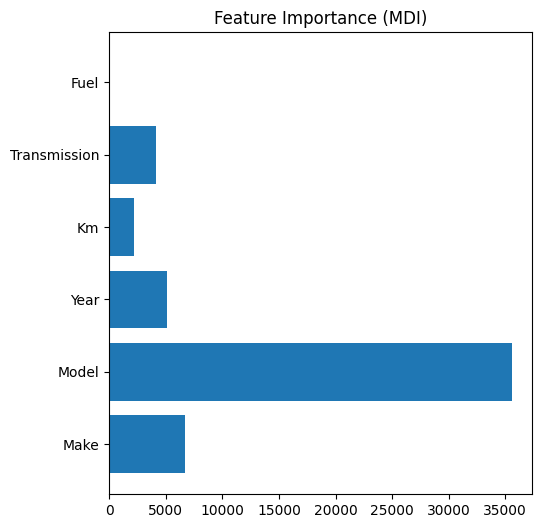

In [29]:
features = list(X_train.columns)
values = list(top_features.scores_)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, values, align="center")
plt.yticks(features, features)
plt.title("Feature Importance (MDI)")

<Axes: >

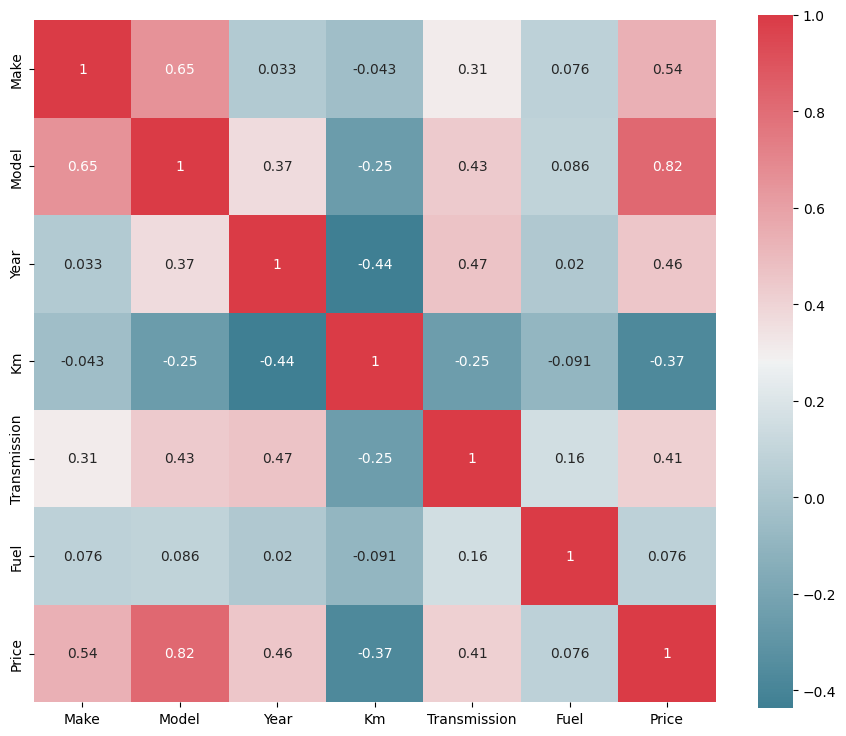

In [119]:
#Plot a Correlation Heat Map 
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
x['Price']=y
sns.heatmap(x.corr(),cmap=cmap,square=True,annot=True)